In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# read dataset.csv
df = pd.read_csv("dataset.csv")

In [3]:
df.columns

Index(['Zaman damgası', 'Cinsiyet', 'Yaş', 'Eğitim Durumu', 'Medeni Durum',
       'Yaşadığınız Bölge', 'Günlük İnternet Kullanım Süresi',
       'E-ticarette en çok alışveriş yaptığınız sektör?',
       'Tercih ettiğiniz ödeme şekli',
       'Bir ürün satın almadan önce Akakçe/Cimri/Epey gibi sitelere bakıyor musunuz?',
       'E-ticaret sitelerinde en çok karşılaştığınız sorun?',
       'Herhangi bir e-ticaret platformunun üyeliğini kullanıyor musunuz?',
       'E-ticaret için en çok tercih ettiğiniz platform'],
      dtype='object')

In [4]:
# drop Zaman damgası column, because it is not necessary
df = df.drop("Zaman damgası", axis=1)

In [5]:
# rename columns
df = df.rename(
    columns={
        "Cinsiyet": "cinsiyet",
        "Yaş": "yas",
        "Eğitim Durumu": "egitim_durumu",
        "Medeni Durum": "medeni_durum",
        "Yaşadığınız Bölge": "bolge",
        "Günlük İnternet Kullanım Süresi": "internet_suresi",
        "E-ticarette en çok alışveriş yaptığınız sektör?": "sektor",
        "Tercih ettiğiniz ödeme şekli": "odeme_sekli",
        "Bir ürün satın almadan önce Akakçe/Cimri/Epey gibi sitelere bakıyor musunuz?": "karsilastirma",
        "E-ticaret sitelerinde en çok karşılaştığınız sorun?": "sorun",
        "Herhangi bir e-ticaret platformunun üyeliğini kullanıyor musunuz?": "uyelik",
        "E-ticaret için en çok tercih ettiğiniz platform": "platform",
    }
)

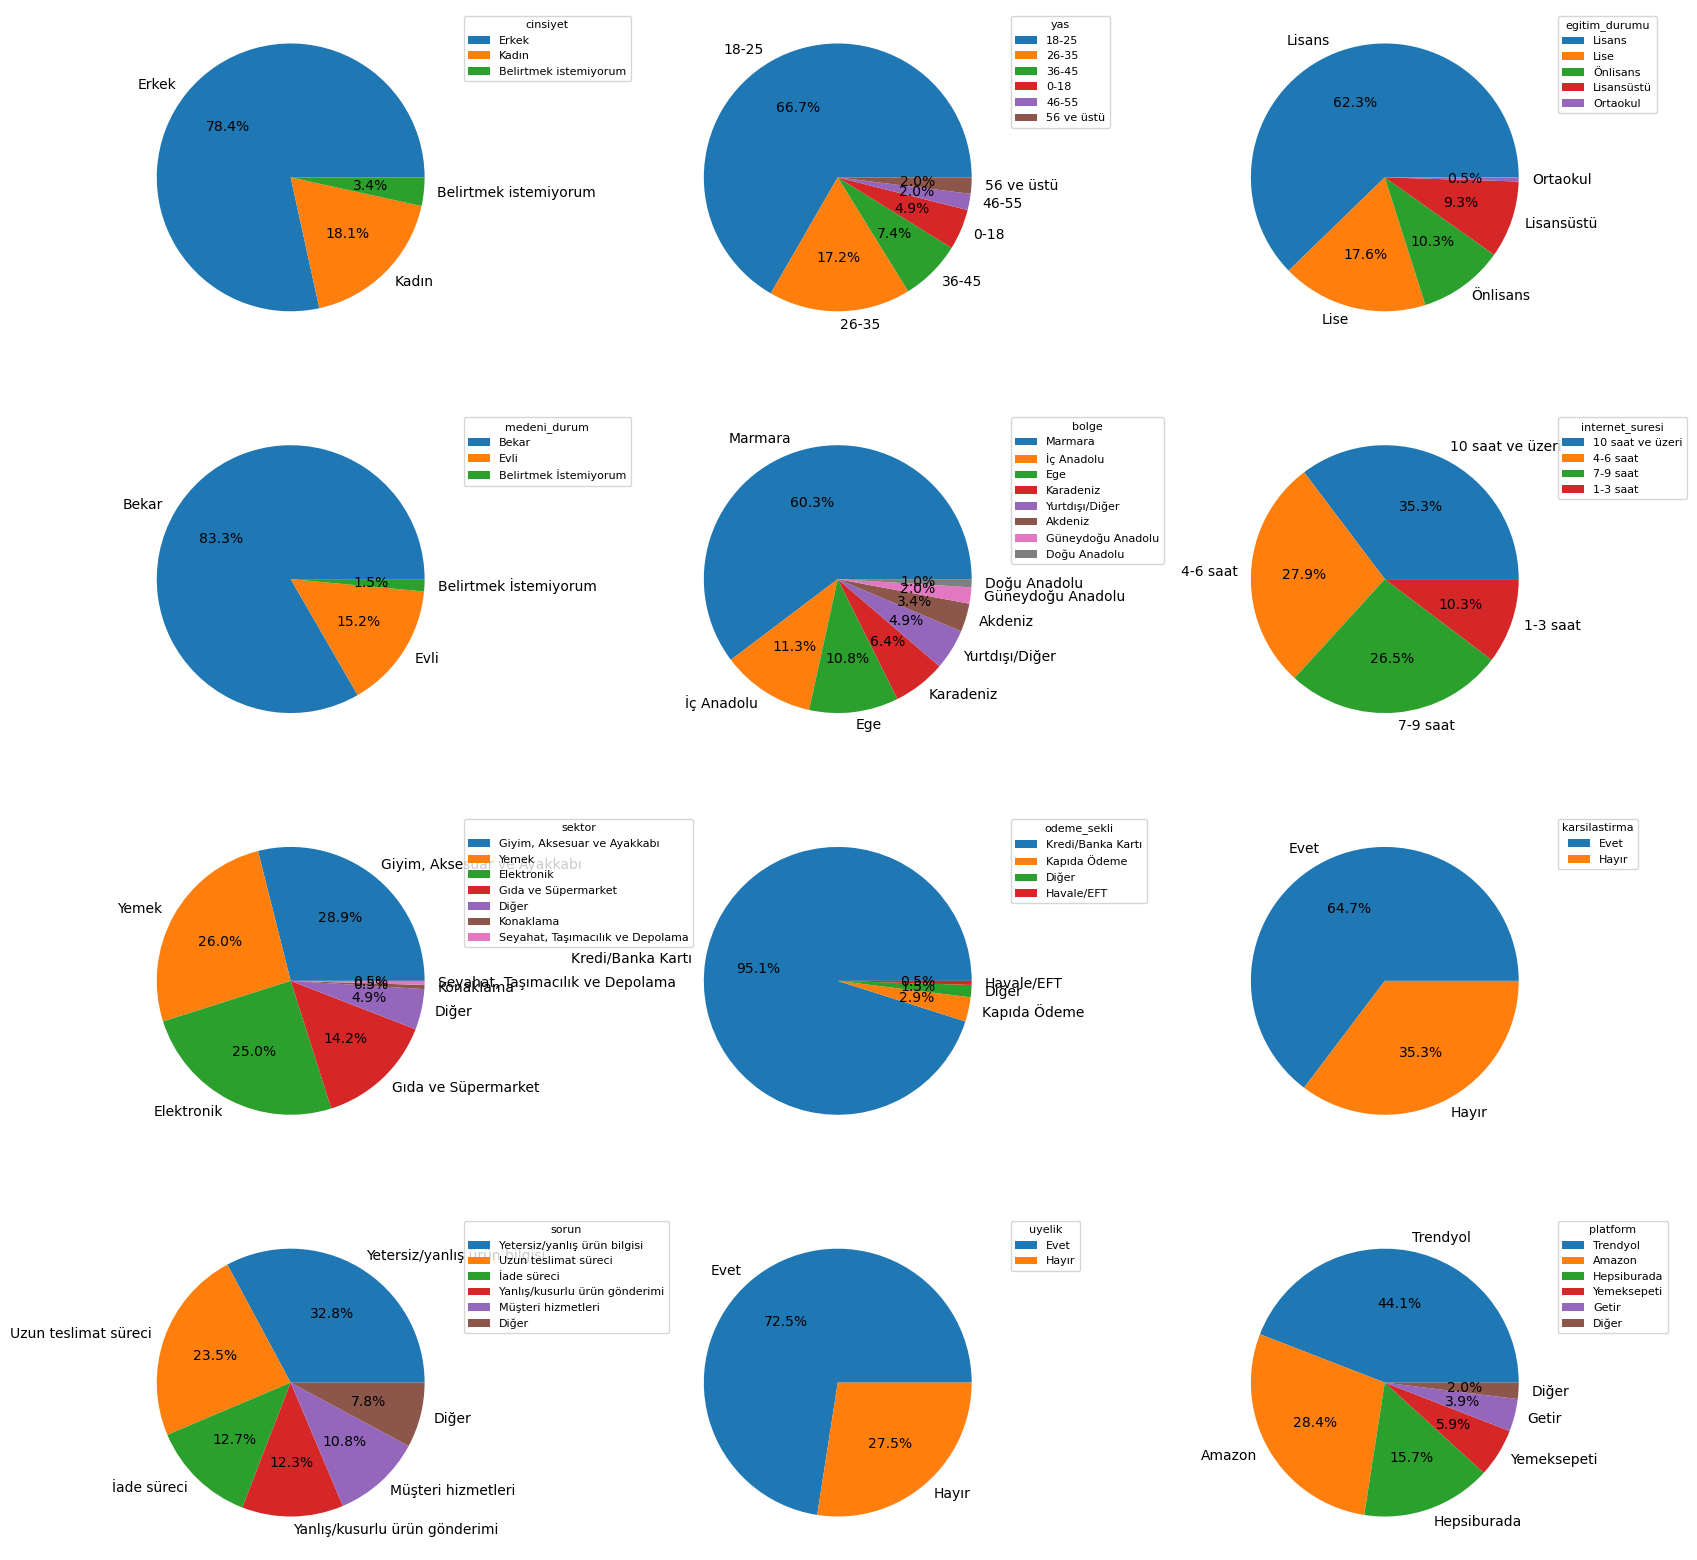

In [6]:
# columns distribution matplotlib pie chart
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.pie(
        df[column].value_counts(),
        labels=df[column].value_counts().index,
        autopct="%1.1f%%",
    )
    # legend
    plt.legend(
        loc="best",
        bbox_to_anchor=(1, 1),
        ncol=1,
        title="{}".format(column),
        title_fontsize=8,
        fontsize=8,
    )
plt.show()

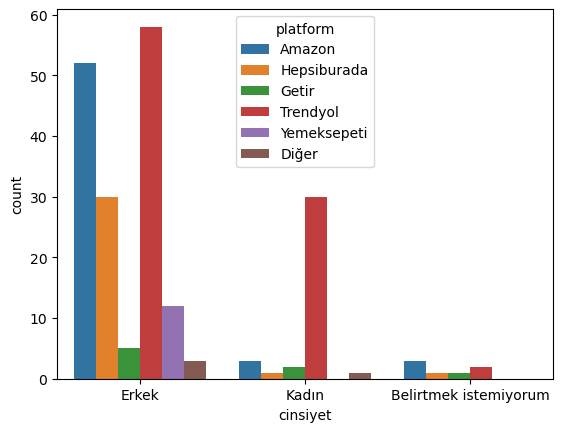

In [7]:
# cinsiyet ve platform relation plot
sns.countplot(x="cinsiyet", hue="platform", data=df)
plt.show()

In [8]:
# replace values with numbers, so we can use them in our models
df = df.replace(
    {
        "cinsiyet": {
            "Kadın": 0,
            "Erkek": 1,
            "Belirtmek istemiyorum": 2,
        },
        "yas": {
            "0-18": 0,
            "18-25": 1,
            "26-35": 2,
            "36-45": 3,
            "46-55": 4,
            "56 ve üstü": 5,
        },
        "egitim_durumu": {
            # "İlkokul": 0, # no data
            "Ortaokul": 0,
            "Lise": 1,
            "Önlisans": 2,
            "Lisans": 3,
            "Lisansüstü": 4,
        },
        "medeni_durum": {
            "Evli": 0,
            "Bekar": 1,
            "Belirtmek İstemiyorum": 2,
        },
        "bolge": {
            "Marmara": 0,
            "Akdeniz": 1,
            "Karadeniz": 2,
            "Ege": 3,
            "İç Anadolu": 4,
            "Doğu Anadolu": 5,
            "Güneydoğu Anadolu": 6,
            "Yurtdışı/Diğer": 7,
        },
        "internet_suresi": {
            # "1 saatten az": 0, # no data
            "1-3 saat": 0,
            "4-6 saat": 1,
            "7-9 saat": 2,
            "10 saat ve üzeri": 3,
        },
        "sektor": {
            "Gıda ve Süpermarket": 0,
            "Seyahat, Taşımacılık ve Depolama": 1,
            "Yemek": 2,
            "Konaklama": 3,
            # "Beyaz Eşya": 4, # no data
            "Elektronik": 4,
            "Giyim, Aksesuar ve Ayakkabı": 5,
            "Diğer": 6,
        },
        "odeme_sekli": {
            "Kredi/Banka Kartı": 0,
            "Kapıda Ödeme": 1,
            "Havale/EFT": 2,
            "Diğer": 3,
        },
        "karsilastirma": {
            "Evet": 0,
            "Hayır": 1,
        },
        "sorun": {
            "Uzun teslimat süreci": 0,
            "İade süreci": 1,
            "Yetersiz/yanlış ürün bilgisi": 2,
            "Müşteri hizmetleri": 3,
            "Yanlış/kusurlu ürün gönderimi": 4,
            "Diğer": 5,
        },
        "uyelik": {
            "Evet": 0,
            "Hayır": 1,
        },
        "platform": {
            "Trendyol": 0,
            "Hepsiburada": 1,
            "Amazon": 2,
            # "N11": 3, # no data
            "Getir": 3,
            "Yemeksepeti": 4,
            "Diğer": 5,
        },
    }
)

In [9]:
# remove Belirtmek istemiyorum and Belirtmek İstemiyorum from cinisyet and medeni_durum
df = df[df.cinsiyet != 2]
df = df[df.medeni_durum != 2]

In [10]:
# split dataset into X and y
X = df.drop("platform", axis=1)
y = df["platform"]

#### 10-fold cross validation of different models

1. Logistic Regression
2. KNN
3. Random Forest
4. SV
5. LightGBM
6. Decision Tree


In [11]:
# import libraries for models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

In [36]:
lr = LogisticRegression(random_state=42)
cv = cross_val_score(lr, X, y, cv=10)
lr_default = round(cv.mean(), 4) * 100
print("LogisticRegression average performance: %", lr_default)

LogisticRegression average performance: % 44.34


In [35]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X, y, cv=10)
knn_default = round(cv.mean(), 4) * 100
print("KNeighborsClassifier average performance: %", knn_default)

KNeighborsClassifier average performance: % 41.29


In [34]:
rf = RandomForestClassifier(random_state=42)
cv = cross_val_score(rf, X, y, cv=10)
rf_default = round(cv.mean(), 4) * 100
print("RandomForestClassifier average performance: %", rf_default)

RandomForestClassifier average performance: % 49.53


In [33]:
svc = SVC(random_state=42)
cv = cross_val_score(svc, X, y, cv=10)
svc_default = round(cv.mean(), 4) * 100
print("SVC average performance: %", svc_default)

SVC average performance: % 43.89


In [32]:
dt = DecisionTreeClassifier(random_state=42)
cv = cross_val_score(dt, X, y, cv=10)
dt_default = round(cv.mean(), 4) * 100
print("DecisionTreeClassifier average performance: %", dt_default)

DecisionTreeClassifier average performance: % 46.42


In [37]:
lgbm = lgb.LGBMClassifier(random_state=42)
cv = cross_val_score(lgbm, X, y, cv=10)
lgbm_default = round(cv.mean(), 4) * 100
print("LGBMClassifier average performance: %", lgbm_default)

LGBMClassifier average performance: % 44.37


### Feature Selection


In [18]:
# simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print(f"Best Score: %{round(classifier.best_score_, 4) * 100}")
    print("Best Parameters: " + str(classifier.best_params_))

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [20]:
lr = LogisticRegression()
param_grid = {
    "max_iter": [2000],
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
}

clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X, y)
clf_performance(best_clf_lr, "Logistic Regression")

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Logistic Regression
Best Score: %44.95
Best Parameters: {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "p": [1, 2],
}
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X, y)
clf_performance(best_clf_knn, "KNN")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
KNN
Best Score: %46.050000000000004
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [22]:
svc = SVC(probability=True)
param_grid = tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.5, 1, 2, 5, 10], "C": [0.1, 1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [0.1, 1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2, 3, 4, 5], "C": [0.1, 1, 10, 100, 1000]},
]
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X, y)
clf_performance(best_clf_svc, "SVC")

Fitting 10 folds for each of 55 candidates, totalling 550 fits
SVC
Best Score: %48.03
Best Parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [23]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [100, 500, 1000],
    "bootstrap": [True, False],
    "max_depth": [3, 5, 10, 20, 50, 75, 100, None],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [1, 2, 4, 10],
    "min_samples_split": [2, 5, 10],
}

clf_rf_rnd = RandomizedSearchCV(
    rf, param_distributions=param_grid, n_iter=100, cv=10, verbose=True, n_jobs=-1
)
best_clf_rf_rnd = clf_rf_rnd.fit(X, y)
clf_performance(best_clf_rf_rnd, "Random Forest")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Random Forest
Best Score: %53.05
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [24]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [400, 450, 500, 550],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True],
    "max_depth": [15, 20, 25],
    "max_features": ["auto", "sqrt", 10],
    "min_samples_leaf": [2, 3],
    "min_samples_split": [2, 3],
}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X, y)
clf_performance(best_clf_rf, "Random Forest")

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Random Forest
Best Score: %51.55
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 450}


In [25]:
from xgboost import XGBClassifier


xgb = XGBClassifier(random_state=1)

param_grid = {
    "n_estimators": [450, 500, 550],
    "colsample_bytree": [0.75, 0.8, 0.85],
    "max_depth": [None],
    "reg_alpha": [1],
    "reg_lambda": [2, 5, 10],
    "subsample": [0.55, 0.6, 0.65],
    "learning_rate": [0.5],
    "gamma": [0.5, 1, 2],
    "min_child_weight": [0.01],
    "sampling_method": ["uniform"],
}

clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_xgb = clf_xgb.fit(X, y)
clf_performance(best_clf_xgb, "XGB")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: %51.55
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.55}


In [38]:
from sklearn.ensemble import VotingClassifier

best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

estimators = [
    ("knn", best_knn),
    ("rf", best_rf),
    ("svc", best_svc),
    ("lr", best_lr),
    ("xgb", best_xgb),
]

voting_clf_hard = cross_val_score(
    VotingClassifier(
        estimators=estimators[:3],
        voting="hard",
    ),
    X,
    y,
    cv=10,
)
voting_clf_soft = cross_val_score(
    VotingClassifier(
        estimators=estimators[:3],
        voting="soft",
    ),
    X,
    y,
    cv=10,
)
voting_clf_all = cross_val_score(
    VotingClassifier(
        estimators=estimators[:4],
        voting="soft",
    ),
    X,
    y,
    cv=10,
)
voting_clf_xgb = cross_val_score(
    VotingClassifier(
        estimators=estimators[:5],
        voting="soft",
    ),
    X,
    y,
    cv=10,
)

print(
    "voting_clf_hard\nMean: %",
    round(voting_clf_hard.mean(), 4) * 100,
)
print(
    "voting_clf_soft\nMean: %",
    round(voting_clf_soft.mean(), 4) * 100,
)
print(
    "voting_clf_all\nMean: %",
    round(voting_clf_all.mean(), 4) * 100,
)
print(
    "voting_clf_xgb\nMean: %",
    round(voting_clf_xgb.mean(), 4) * 100,
)

voting_clf_hard
Mean: % 49.05
voting_clf_soft
Mean: % 46.5
voting_clf_all
Mean: % 44.92
voting_clf_xgb
Mean: % 48.03


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(196, 5)


In [40]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

lr_cv = cross_val_score(lr, X_pca, y, cv=10)
knn_cv = cross_val_score(knn, X_pca, y, cv=10)
rf_cv = cross_val_score(rf, X_pca, y, cv=10)
svc_cv = cross_val_score(svc, X_pca, y, cv=10)
dt_cv = cross_val_score(dt, X_pca, y, cv=10)

# results
print(
    "LogisticRegression average performance with PCA: %", round(lr_cv.mean(), 4) * 100
)
print(
    "KNeighborsClassifier average performance with PCA: %",
    round(knn_cv.mean(), 4) * 100,
)
print(
    "RandomForestClassifier average performance with PCA: %",
    round(rf_cv.mean(), 4) * 100,
)
print("SVC average performance with PCA: %", round(svc_cv.mean(), 4) * 100)
print(
    "DecisionTreeClassifier average performance with PCA: %",
    round(dt_cv.mean(), 4) * 100,
)

LogisticRegression average performance with PCA: % 47.39
KNeighborsClassifier average performance with PCA: % 39.82
RandomForestClassifier average performance with PCA: % 40.26
SVC average performance with PCA: % 41.260000000000005
DecisionTreeClassifier average performance with PCA: % 42.24


<AxesSubplot:>

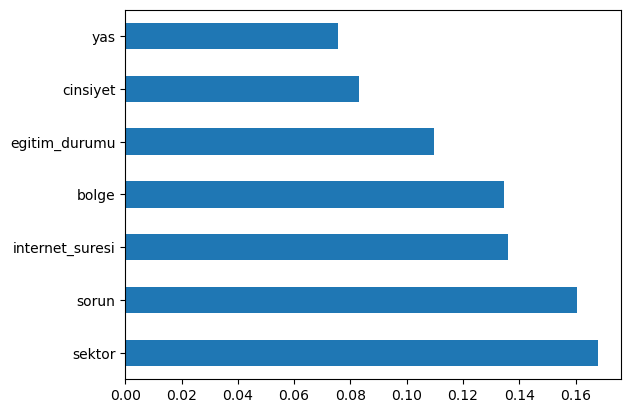

In [27]:
best_rf = best_clf_rf.best_estimator_.fit(X, y)
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind="barh")

In [68]:
# use only important features for models
important_features = feat_importances.nlargest(8)
important_features.index

Index(['sektor', 'sorun', 'internet_suresi', 'bolge', 'egitim_durumu',
       'cinsiyet', 'yas', 'uyelik'],
      dtype='object')

In [69]:
X_important = df.drop("platform", axis=1).loc[:, important_features.index]

In [70]:
lr = LogisticRegression(random_state=42)
cv = cross_val_score(lr, X_important, y, cv=10)
lr_with_important_features = round(cv.mean(), 4) * 100
print("LogisticRegression average performance: %", lr_with_important_features)

LogisticRegression average performance: % 44.84


In [71]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_important, y, cv=10)
knn_with_important_features = round(cv.mean(), 4) * 100
print("KNeighborsClassifier average performance: %", knn_with_important_features)

KNeighborsClassifier average performance: % 40.87


In [72]:
rf = RandomForestClassifier(random_state=42)
cv = cross_val_score(rf, X_important, y, cv=10)
rf_with_important_features = round(cv.mean(), 4) * 100
print("RandomForestClassifier average performance: %", rf_with_important_features)

RandomForestClassifier average performance: % 51.66


In [73]:
svc = SVC(random_state=42)
cv = cross_val_score(svc, X_important, y, cv=10)
svc_with_important_features = round(cv.mean(), 4) * 100
print("SVC average performance: %", svc_with_important_features)

SVC average performance: % 44.34


In [74]:
dt = DecisionTreeClassifier(random_state=42)
cv = cross_val_score(dt, X_important, y, cv=10)
dt_with_important_features = round(cv.mean(), 4) * 100
print("DecisionTreeClassifier average performance: %", dt_with_important_features)

DecisionTreeClassifier average performance: % 43.34


In [76]:
lgbm = lgb.LGBMClassifier(random_state=42)
cv = cross_val_score(lgbm, X_important, y, cv=10)
lgbm_with_important_features = round(cv.mean(), 4) * 100
print("LGBMClassifier average performance: %", lgbm_with_important_features)

LGBMClassifier average performance: % 48.53
